# Introduction
>Our project was to combine together multiple datasets to find what we considered to be the "best" neighborhood in Pittsburgh. We first had to think of what being the "best" neighborhood mean't to us. We settled on the idea of the best neighborhood being the neighborhood where it would be the best to speed. John was quick to find a few datasets that would be related to traffic and road statistics and we ended up using almost all of our original datasets. We didn't explore any alternatives as we knew this idea would be good and easily supportable with our acquired datasets.

# Datasets

- [Locations of crosswalks in the city](Datasets/Crosswalks.csv)

- [Data on various traffic signs such as top, yield, and crosswalk, and where they are located](Datasets/Traffic_Signs.csv)

- [Locations of speed bumps installed to slow down traffic](Datasets/Traffic_Signs.csv)

- [Data on amount of traffic in the city as well as speeds](Datasets/Car_Count.csv)

# Number of Crosswalks

One of the datasets we used were the number of crosswalks in each neighborhood. The assumption we made was that with more crosswalks, cars would be required to stop more often making it worse to speed. I calculated which neighborhood had the least amount of crosswalks, which would be the best for speeding.

neighborhood
Northview Heights        18
Spring Hill-City View    18
Crafton Heights          17
Banksville               16
South Shore              15
California-Kirkbride     15
Regent Square            15
Lincoln Place            15
Esplen                   15
Arlington                13
Bon Air                  12
Windgap                  11
Westwood                 11
Mt. Oliver                8
Mount Oliver Borough      8
Bedford Dwellings         8
Oakwood                   8
Swisshelm Park            7
Glen Hazel                7
Hays                      7
Spring Garden             6
Fairywood                 3
Fineview                  3
Summer Hill               3
Chartiers City            1
St. Clair                 1
New Homestead             1
Name: count, dtype: int64


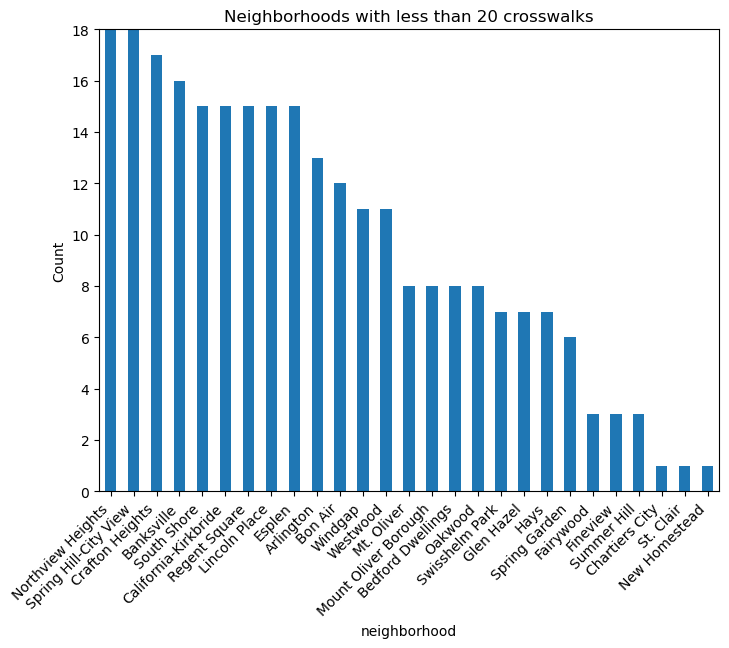

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Datasets/Crosswalks.csv')
num = df['neighborhood'].value_counts()
under20 = num[num < 20]
print(under20)

plt.figure(figsize=(8, 6))
under20.plot(kind='bar')
plt.xlabel('neighborhood')
plt.ylim(0, 18)
plt.ylabel('Count')
plt.title(f'Neighborhoods with less than 20 crosswalks')
plt.xticks(rotation=45, ha='right')
plt.show()

# Number of Speed Bumps

Provided by the City of Pittsburgh's Department of Mobility & Infrastructure, the data reports on the location, type, and amount of speedbumps in any given neighborhood in Pittsburgh. I sorted through each speed bump, finding where in the city it was. Ultimately, Squirrel Hill South and Carrick had significatn numbers of speedbumps, while every other neighborhood was more or less unnaffected.

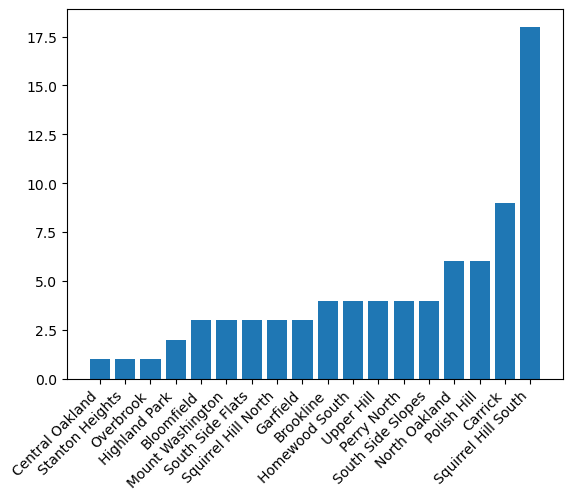

In [2]:
# load pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load data
data = pd.read_csv('speed_bumps.csv', index_col="_id")

# creates an empty dictionary to store neighborhoods and how many speed bumps
neighborhoodBumps = {}

# loops through each bump in dataset
for index, row in data.iterrows():
    #gets neighborhood bump is in
    neighborhood = row['neighborhood']

    #tries to increment number of bumps in neighborhood, if neighborhood does not yet exist it will create it in dictionary
    try:
        neighborhoodBumps[neighborhood] += 1

    except:
        neighborhoodBumps[neighborhood] = 1

#sort dictionary by num of bumps
d = dict(sorted(neighborhoodBumps.items(), key=lambda item: item[1]))

#displays data
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.xticks(rotation=45, ha='right')

plt.show()



# Number of Traffic Signs

My code shows top 10 neighborhoods with the most stop signs. I felt this data would be more useful sense so many neighborhoods are tied with one stop sign this will let us know places you definitley dont want to go for speeding.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'California-Kirkbride'),
  Text(1, 0, 'Overbrook'),
  Text(2, 0, 'Squirrel Hill North'),
  Text(3, 0, 'Highland Park'),
  Text(4, 0, 'North Shore'),
  Text(5, 0, 'East Allegheny'),
  Text(6, 0, 'Central Northside'),
  Text(7, 0, 'Bluff'),
  Text(8, 0, 'Point Breeze'),
  Text(9, 0, 'Central Oakland')])

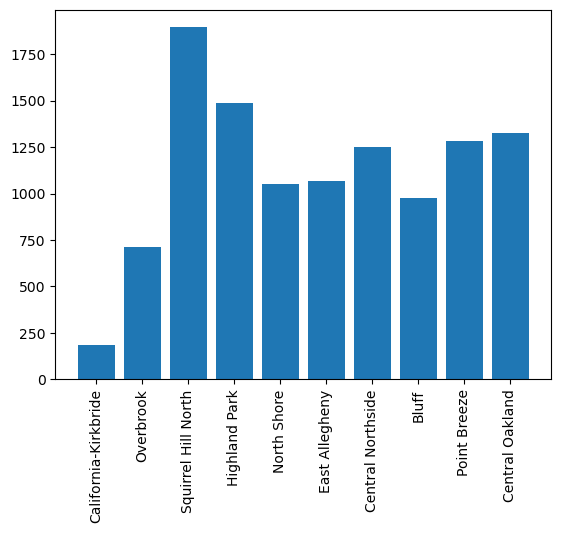

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import operator#sort items by value

empy = pd.read_csv("Datasets/Traffic_Signs.csv")#reads file csv.csv 
neighborhood = {}#stores amount of stop signs for each neighborhood
for index, row in empy.iterrows():#goes throguh the rows of the empy dataframe
    if row["neighborhood"] in neighborhood:
        neighborhood[row["neighborhood"]] += 1
    else:
        neighborhood[row["neighborhood"]] = 1# counts how many times each appears
        
highest = dict(sorted(neighborhood.items(), key=operator.itemgetter(1), reverse=True))
#creating a new dictionary called highest
plt.bar(list(neighborhood.keys())[:10], list(neighborhood.values())[:10])#creates plot bar with top 10 neighborhoods
plt.xticks(rotation=90)# rotates 90 degrees

# Speed and Quantity of Cars

This traffic count data is provided by the City of Pittsburgh's Department of Mobility & Infrastructure (DOMI). Counters were deployed as part of traffic studies, including intersection studies, and studies covering where or whether to install speed humps. The data is only available for the most recent count at each location.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

TCT = pd.read_csv('Datasets/Car_Count.csv') # TCT : Traffic Count Table
to_keep = ["average_daily_car_traffic", "speed_limit", "max_speed", "median_speed", "percent_over_limit", "neighborhood"]

filtered = TCT.filter(to_keep) # Keeps only wanted columns
filtered = filtered.dropna(subset=["average_daily_car_traffic", "speed_limit", "max_speed", "percent_over_limit"]) # Removes all data where the average daily car traffic is NaN
filtered = filtered.sort_values(by=["neighborhood", "percent_over_limit"])

group_by_percent_over_mean = filtered.groupby("neighborhood")["percent_over_limit"].mean().reset_index()
filtered["max_minus_limit"] = filtered["max_speed"] - filtered["speed_limit"]
group_by_max_minus_limit = filtered.groupby("neighborhood")["max_minus_limit"].mean().reset_index()

sorted_pom = group_by_percent_over_mean.sort_values(by="percent_over_limit")
sorted_mml = group_by_max_minus_limit.sort_values(by="max_minus_limit")

merged = sorted_pom.merge(sorted_mml, on="neighborhood")
merged = merged.query("percent_over_limit >= 50 & max_minus_limit >=30")

merged_sort_mml = merged.sort_values(by="max_minus_limit")

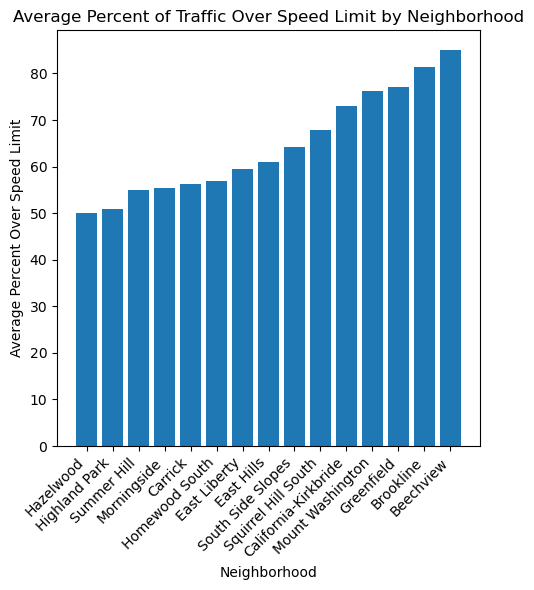

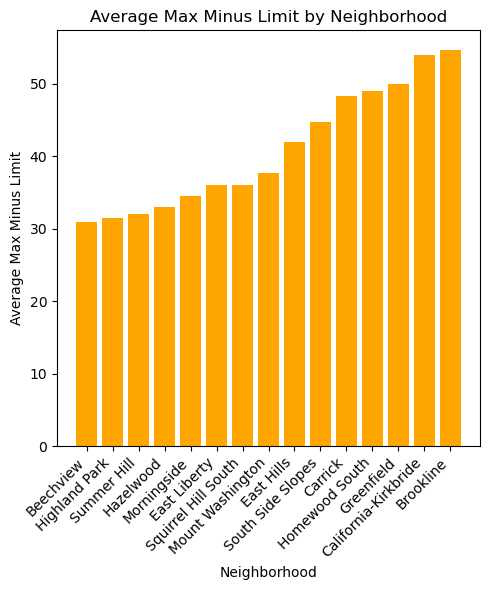

In [3]:
plt.figure(figsize=(5, 6))
plt.bar(merged['neighborhood'], merged['percent_over_limit'])
plt.xlabel('Neighborhood')
plt.ylabel('Average Percent Over Speed Limit')
plt.title('Average Percent of Traffic Over Speed Limit by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

plt.figure(figsize=(5, 6))
plt.bar(merged_sort_mml['neighborhood'], merged_sort_mml['max_minus_limit'], color='orange')
plt.xlabel('Neighborhood')
plt.ylabel('Average Max Minus Limit')
plt.title('Average Max Minus Limit by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

# Best Neighborhood

Given it's high tendency for it's residents to speed, the low amount of speed bumps and traffic signs, we determined that Brookline was the best neighborhood to live in as a fast driver. The combination of few traffic interuptions and generally fast drivers means it's easy to drive continuously at a fast pace. While Brookline does have many crosswalks, we decided that wasn't nearly as important as the other metrics measured, which all gave a clear picture of Brookline as the winner.


# Conclusion



Leonard: I have lived in Pittsburgh my whole life, and I have lived in Brookline for a few years. My dataset shows that although it is not the number 1 safest neighborhood for speeding it is still one of the safest. Its also a pretty quiet area, and my neighbors always talk about how safe it is. I was suprised to find out that my partners studies found it the best area for speeding, and I still dont think I personally agree with it being the best.

Graham: I have only lived in Pittsburgh for a few months and do not have a car so it is hard to say what the best neighborhood to speed in is personally. However after looking at all our data and talking to a group member I definitely can see how Brookline would be the best neighborhood to speed in. 

John: As someone who has only lived in Pittsburgh for a few months and done no driving, I don't really have a stake in which neighborhood should be the best, however using the data it seems pretty undeniably to be Brookline. I know form personal experience that it is definetly not Oakland, so I assume our metric is accurate.

Sarthak: I have only lived in Pittsburgh for the few months I have been in college, and have done no driving. I don't have personal experience on which neighborhood would be the best to speed in, but based on the data presented, Brookline seems to be the best neighborhood to speed in. This is because it has very good speeding numbers, which means many people tend to speed in Brookline.